In [24]:
import os
import sys

# Get the parent directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path
sys.path.append(parent_dir)
import sem 
import cv2
import matplotlib.pyplot as plt
import matplotlib
import struct
import numpy as np
from importlib import reload

c:\Users\jc2713\OneDrive - Imperial College London\Documents\GitHub\RaithSEM\Example\IMAGE241.bmp
c:\Users\jc2713\OneDrive - Imperial College London\Documents\GitHub\RaithSEM\Example\IMAGE241.ssc


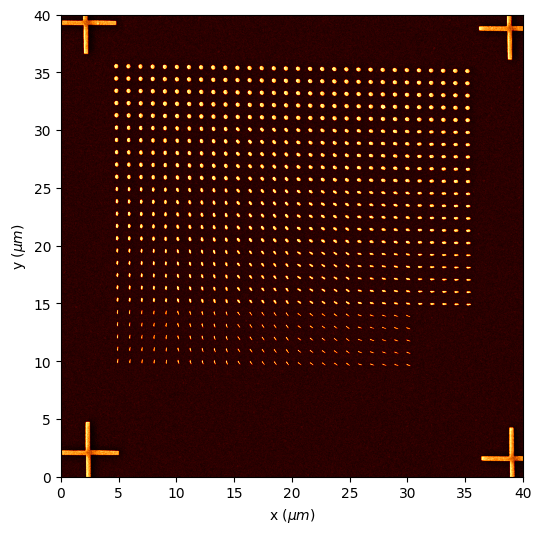

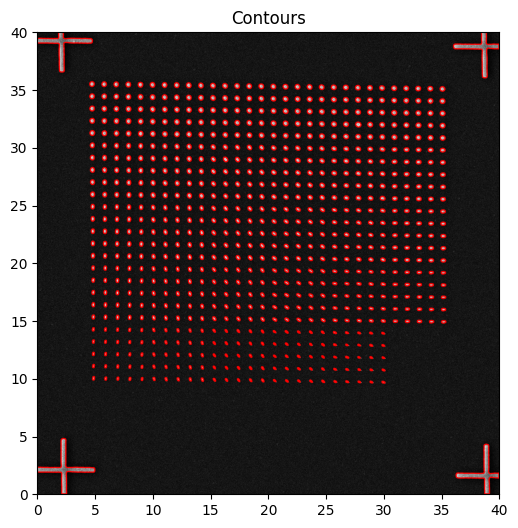

In [33]:
reload(sem)

folder = os.getcwd()
file_im = 'IMAGE241.bmp'
file_meta = 'IMAGE241.ssc'

image, meta = sem.read_raithfile(folder, file_im, file_meta)

# Print the resulting dictionary
metadata_dict = sem.meta2dict(meta)
px_size = float(metadata_dict['SLOWSCAN']['Step Size'].replace('µm',''))
fig,ax = plt.subplots(1,1, figsize = (6,6))
ax.imshow(image, origin='lower',cmap='afmhot', extent=[0, image.shape[0]*px_size, 0, image.shape[1]*px_size]) 
ax.set_xlabel('x ($\mu m$)')
ax.set_ylabel('y ($\mu m$)')
plt.show()

def max_length_cond(length,width, angle, center,max_length = 100):
    if length < max_length:
        return(True)
    else:
        return(False)

def max_width_cond(length,width, angle, center,max_width = 50):
    if width < max_width:
        return(True)
    else:
        return(False)

img_gray, binary_image, x_scale, y_scale = sem.preprocess_image2(image,lower_cutoff=None,pixel_scale_nm=px_size*1000)
contours = sem.detect_contours(binary_image)
fig_cont = sem.plot_contours(img_gray, contours,px_size=px_size)
fig_bin = sem.plot_binary_image(binary_image,px_size)
all_shapes, select_shapes, lengths, widths, angles, central_positions_x, central_positions_y, centers, fig= sem.min_area_bounding_shapes(image,contours,px_2_nm=0.01,shape_type='ellipse', conditions=[max_length_cond,max_width_cond])
lengths_nm = sem.convert_to_nm(lengths, pixel_scale_nm=px_size*1000)
widths_nm = sem.convert_to_nm(widths, pixel_scale_nm=px_size*1000)
central_positions_x_nm = sem.convert_to_nm(central_positions_x, pixel_scale_nm=px_size*1000)
central_positions_y_nm = sem.convert_to_nm(central_positions_y, pixel_scale_nm=px_size*1000)
centers_nm = sem.convert_to_nm(centers, pixel_scale_nm=px_size*1000)
fig_hist = sem.plot_histograms(lengths_nm,widths_nm,angles)
fig_sca = sem.plot_scatter(image, central_positions_x_nm,central_positions_y_nm,lengths_nm,widths_nm, x_scale,y_scale)
plt.show()


C:\Users\jc2713\Downloads\WF100-Dose500\WF100-Dose500\IMAGE241.bmp
C:\Users\jc2713\Downloads\WF100-Dose500\WF100-Dose500\IMAGE241.ssc
Data saved to analysis_data.h5


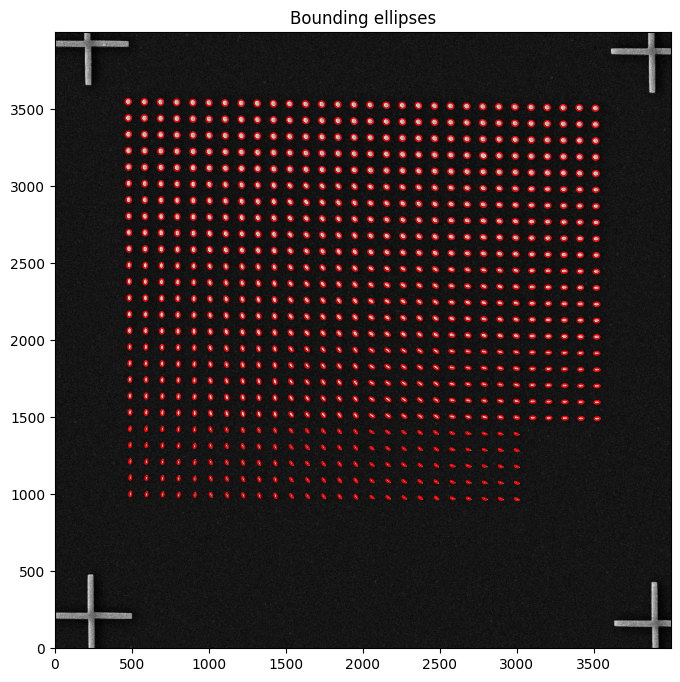

In [13]:
# Example to save to powerpoint and save as a h5 file.
import os
import sem
import cv2
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from pptx import Presentation
from pptx.util import Inches
import h5py

# Reload the sem module
reload(sem)

# Define your folder and files
folder = r'C:\Users\jc2713\Downloads\WF100-Dose500\WF100-Dose500'
file_im = 'IMAGE241.bmp'
file_meta = 'IMAGE241.ssc'

# Read the image and metadata
image, meta = sem.read_raithfile(folder, file_im, file_meta)

# Print the resulting dictionary
metadata_dict = sem.meta2dict(meta)
px_size = float(metadata_dict['SLOWSCAN']['Step Size'].replace('µm', ''))

# Create a PowerPoint presentation
presentation = Presentation()

# Create a slide layout
slide_layout = presentation.slide_layouts[5]  # Using a blank slide layout

# Function to save a figure
def save_figure(fig, filename):
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)

# Create and save the main image figure
fig, ax = plt.subplots(1, 1)
ax.imshow(image, origin='lower')
image_filename = 'main_image.png'
save_figure(fig, image_filename)

# Create binary image and save it
img_gray, binary_image, x_scale, y_scale = sem.preprocess_image2(image, lower_cutoff=None, pixel_scale_nm=px_size * 1000)
contours = sem.detect_contours(binary_image)
fig_bin = sem.plot_binary_image(binary_image)
binary_filename = 'binary_image.png'
save_figure(fig_bin, binary_filename)

# Create bounding shapes and save the histogram and scatter plots
all_shapes, select_shapes, lengths, widths, angles, central_positions_x, central_positions_y, centers, fig = sem.min_area_bounding_shapes(image, contours, px_2_nm=0.01, shape_type='ellipse', conditions=[max_length_cond, max_width_cond])
lengths_nm = sem.convert_to_nm(lengths, pixel_scale_nm=px_size * 1000)
widths_nm = sem.convert_to_nm(widths, pixel_scale_nm=px_size * 1000)

# Create and save histogram figure
fig_hist = sem.plot_histograms(lengths_nm, widths_nm, angles)
histogram_filename = 'histogram.png'
save_figure(fig_hist, histogram_filename)

# Create and save scatter plot figure
fig_sca = sem.plot_scatter(image, central_positions_x_nm, central_positions_y_nm, lengths_nm, widths_nm, x_scale, y_scale)
scatter_filename = 'scatter_plot.png'
save_figure(fig_sca, scatter_filename)

# Add images and statistical summary to the PowerPoint
def add_image_to_slide(presentation, image_path):
    slide = presentation.slides.add_slide(slide_layout)
    left = Inches(0)
    top = Inches(0)
    slide.shapes.add_picture(image_path, left, top, width=Inches(6))

# Add images to slides
add_image_to_slide(presentation, image_filename)
add_image_to_slide(presentation, binary_filename)
add_image_to_slide(presentation, histogram_filename)
add_image_to_slide(presentation, scatter_filename)

# Add statistical summary
slide = presentation.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Statistical Summary"

content = slide.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(5))
text_frame = content.text_frame

# Create a summary of statistics
summary = f"""
Statistical Summary:
- Lengths (nm): Mean = {np.mean(lengths_nm):.2f}, Std = {np.std(lengths_nm):.2f}
- Widths (nm): Mean = {np.mean(widths_nm):.2f}, Std = {np.std(widths_nm):.2f}
- Angles (degrees): Mean = {np.mean(angles):.2f}, Std = {np.std(angles):.2f}
"""

text_frame.text = summary

# Save the presentation
presentation.save('analysis_presentation.pptx')


# Step 3: Save data to HDF5 file
h5_filename = 'analysis_data.h5'
with h5py.File(h5_filename, 'w') as h5file:
    # Save lengths, widths, angles, shapes, centers, and positions
    h5file.create_dataset('lengths_nm', data=lengths_nm)
    h5file.create_dataset('widths_nm', data=widths_nm)
    h5file.create_dataset('angles', data=angles)
    #h5file.create_dataset('shapes', data=select_shapes)
    h5file.create_dataset('centers', data=centers)
    h5file.create_dataset('central_positions_x_nm', data=central_positions_x)
    h5file.create_dataset('central_positions_y_nm', data=central_positions_y)
    
    # Save the image filename
    h5file.create_dataset('image_name', data=str(file_im))

print(f"Data saved to {h5_filename}")